# 📄 About the Dataset

**Description:**  
This dataset contains credit card transactions made by **European cardholders in 2013**. It includes over **284,807 anonymized records**, specifically prepared to support the development of **fraud detection** algorithms. All sensitive information has been transformed or removed to ensure **user privacy** and **ethical compliance**.

---

### 🔑 Key Features

- **`V1` – `V28`**: Numerical features generated through **Principal Component Analysis (PCA)**  
- **`Amount`**: The transaction amount in currency units  
- **`Time`**: Seconds elapsed since the first transaction in the dataset  
- **`Class`**: Target label  
  - `0` → Legitimate transaction  
  - `1` → Fraudulent transaction  

---

### 🔍 What is PCA?

**Principal Component Analysis (PCA)** is a dimensionality reduction technique that:
- Projects high-dimensional data onto new axes (called **principal components**)
- Captures the **directions of maximum variance**
- Produces **uncorrelated**, privacy-safe features

In this dataset:
- `V1` captures the most variance  
- `V2` captures the second most  
- ...up to `V28`, which captures the least  

This transformation retains the **most critical data patterns** while anonymizing original attributes like merchant, location, or device.

---
## 🧠 Initial Data Insights

- The dataset contains **no missing values**, so imputation is unnecessary.  
- Only `Amount` and `Time` are **not PCA-transformed**; the remaining features (`V1`–`V28`) are numerical principal components derived from **PCA**, each representing transformed variance directions.
- The **average transaction amount** is approximately **88 units** (currency unspecified).
- The dataset is **highly imbalanced**:
  - ✅ **99.83%** are **legitimate transactions**
  - ⚠️ Only **0.17%** are labeled as **fraudulent**

> ⚠️ Because of this imbalance, traditional metrics like accuracy can be misleading. We'll focus on **precision, recall**, and **AUC-PR** to evaluate model performance.

---


### 📦 Data Source

This dataset was collected from real-world credit card transactions and prepared for public research by anonymizing all sensitive fields in accordance with **privacy laws** and **ethical guidelines**.
> 📚 **Citation**:  
> Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson, Gianluca Bontempi. *Calibrating Probability with Undersampling for Unbalanced Classification*. In Symposium on Computational Intelligence and Data Mining (CIDM), 2015.  
> [Kaggle Dataset - Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

---

## 🎯 Project Objective

Build a machine learning model to classify credit card transactions as **fraudulent (`1`)** or **legitimate (`0`)**, using historical data to accurately detect suspicious activity with high recall and minimal false positives.

---

> 💡 If running locally outside Colab, install KaggleHub using:
```bash
pip install kagglehub


## 💳Set Up and Load the Dataset

In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Construct the full path to the CSV file
csv_file = os.path.join(path, "creditcard.csv")

# Load the dataset
df = pd.read_csv(csv_file)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## ✅Basic Diagnostics

In [ ]:
# Basic diagnostics
print("\n🧼 Missing values per column:")
print(df.isnull().sum())

class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100

print("\n📉 Class distribution (detailed):")
for label in class_counts.index:
    label_name = "Legit" if label == 0 else "Fraud"
    print(f"{label_name} ({label}): {class_counts[label]} samples ({class_percentages[label]:.4f}%)")


🧼 Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

📉 Class distribution (detailed):
Legit (0): 284315 samples (99.8273%)
Fraud (1): 492 samples (0.1727%)


## 🧭 Project Workflow Overview

### 1. Data Exploration  
- Loaded and inspected the credit card fraud detection dataset  
- Visualized the distributions of `Amount` and `Time` for both Fraud and Legit transactions (log-scaled)  
- Confirmed extreme class imbalance (Fraud ≈ 0.17%)  
- Verified absence of missing values  

---

### 2. Preprocessing  
- Applied `RobustScaler` to `Amount` and `Time` to handle outliers  
- Replaced original `Amount` and `Time` with `scaled_amount` and `scaled_time`  
- Defined feature matrix `X` and target vector `y`  
- Performed a stratified train/test split (80/20)  

---

### 3. Class Imbalance Handling  
- Resampled training data using a pipeline:  
  - **SMOTE** to oversample fraud cases  
  - **RandomUndersampler** to downsample legitimate cases  
- Verified and visualized class distribution after resampling  

---

### 4. Model Training
- Trained baseline models on resampled training data:  
  - Random Forest  
  - XGBoost  
  - Linear SVM  
  - Logistic Regression (`class_weight='balanced'`)  
- Scaled input used for linear models  
- Evaluation done on the original (unbalanced) test set  

---

### 5. Evaluation Metrics  
- Focused on imbalanced classification metrics:  
  - **Precision** – proportion of predicted frauds that were correct  
  - **Recall** – proportion of actual frauds detected  
  - **F1-Score** – harmonic mean of precision and recall  
  - **AUC-PR** – area under the Precision-Recall curve (preferred for imbalance)  
  - **AUC-ROC** – area under the ROC curve  
- Visualized:  
  - Confusion matrices  
  - Precision-Recall curves  
  - ROC curves  

---

### 6. Hyperparameter Tuning  
- Tuned key models using `RandomizedSearchCV`:  
  - Random Forest  
  - XGBoost  
  - Logistic Regression
- Used `average_precision` as the scoring metric  
- Tuning done on a 10,000-sample subset of the resampled training data for speed  
- Evaluated tuned models on the original test set  

---

### 7. Final Results & Interpretation  
- Compared untuned vs tuned model performance  
- Tuned models showed improvements in F1-Score and AUC-PR  
- Selected **Tuned Random Forest** as the final model  
- Plotted **top 15 feature importances** to interpret model behavior  


## 🛠️ Import Core Libraries and Tools

In [ ]:
# Core and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and evaluation tools
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import (train_test_split, RandomizedSearchCV)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    precision_recall_curve, auc, RocCurveDisplay
)

# Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold

# Imbalance handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## 🔹 Visualize Amount and Time Distributions


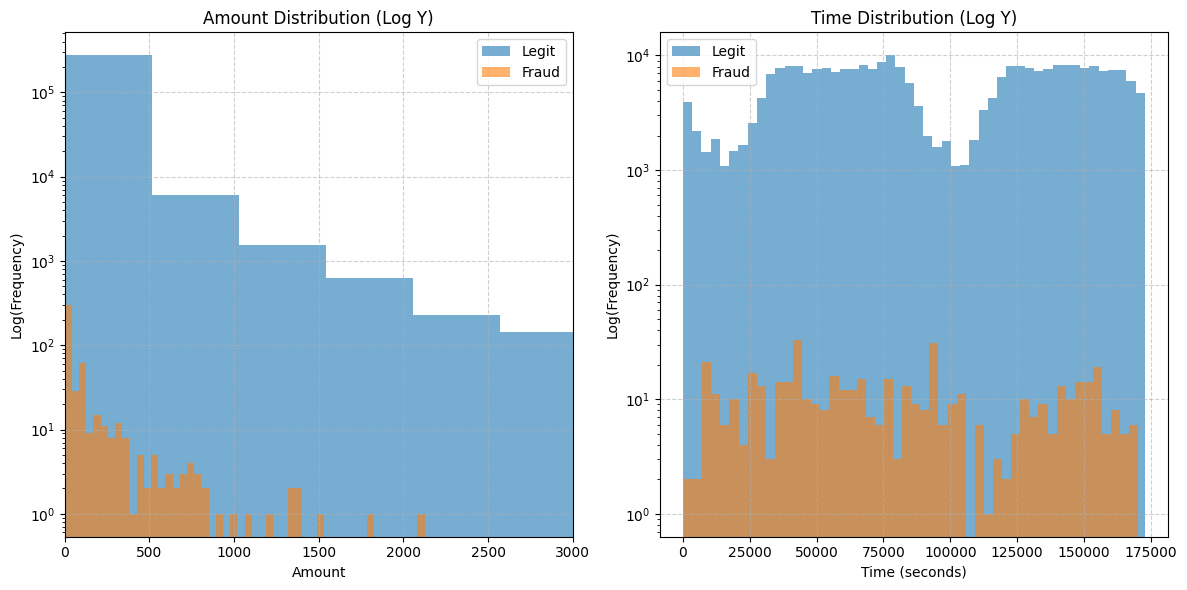

In [ ]:
plt.figure(figsize=(12, 6))

# Amount distribution (log y-axis)
plt.subplot(1, 2, 1)
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.6, label='Legit')
plt.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.6, label='Fraud')
plt.yscale('log')  # 🔍 log scale
plt.title('Amount Distribution (Log Y)')
plt.xlabel('Amount')
plt.ylabel('Log(Frequency)')
plt.xlim(0, 3000)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Time distribution (log y-axis)
plt.subplot(1, 2, 2)
plt.hist(df[df['Class'] == 0]['Time'], bins=50, alpha=0.6, label='Legit')
plt.hist(df[df['Class'] == 1]['Time'], bins=50, alpha=0.6, label='Fraud')
plt.yscale('log')  # 🔍 log scale
plt.title('Time Distribution (Log Y)')
plt.xlabel('Time (seconds)')
plt.ylabel('Log(Frequency)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### 📊 Feature Distribution: Amount & Time

We visualized the distributions of `Amount` and `Time` for both legitimate and fraudulent transactions.

- **Fraudulent transactions** tend to involve smaller amounts and are more uniformly distributed over time.  
- **Legitimate transactions** cover a broader range of amounts and exhibit periodic patterns over time.  

These patterns justify the need to scale `Amount` and `Time` before modeling, and motivate separate treatment of fraud signals during preprocessing.

## 📂 Train/Test Split


In [ ]:
# Split features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 🧹 Data Preprocessing

> We used **RobustScaler** to scale both features because `Amount` is highly skewed and contains outliers. Unlike `StandardScaler`, `RobustScaler` uses the median and IQR, making it more stable and resistant to distortion from extreme values.

In [ ]:
# Scale 'Amount' and 'Time' using separate RobustScaler instances on training data
amount_scaler = RobustScaler()
time_scaler = RobustScaler()

# Fit and transform on the training data
X_train['scaled_amount'] = amount_scaler.fit_transform(X_train[['Amount']])
X_train['scaled_time'] = time_scaler.fit_transform(X_train[['Time']])

# Transform the test data using the already fitted scalers
X_test['scaled_amount'] = amount_scaler.transform(X_test[['Amount']])
X_test['scaled_time'] = time_scaler.transform(X_test[['Time']])

# Drop original columns and reorder
X_train.drop(['Time', 'Amount'], axis=1, inplace=True)
X_test.drop(['Time', 'Amount'], axis=1, inplace=True)

# Reorder columns for consistency
X_train = X_train[['scaled_time', 'scaled_amount'] + [col for col in X_train.columns if col not in ['scaled_time', 'scaled_amount']]]
X_test = X_test[['scaled_time', 'scaled_amount'] + [col for col in X_test.columns if col not in ['scaled_time', 'scaled_amount']]]

## 🧪 ZeroR Baseline

📉 ZeroR (DummyClassifier - most_frequent) Performance:

  Accuracy: 0.9983
 Precision: 0.0000
    Recall: 0.0000
  F1 Score: 0.0000


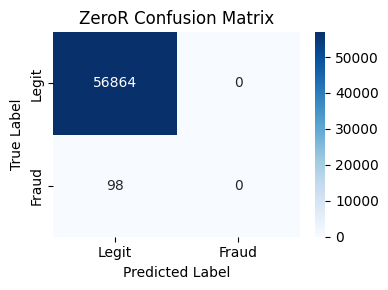

In [ ]:
# ZeroR baseline: always predicts the majority class
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

# Compute metrics
metrics_dummy = {
    "Accuracy": accuracy_score(y_test, y_pred_dummy),
    "Precision": precision_score(y_test, y_pred_dummy, zero_division=0),
    "Recall": recall_score(y_test, y_pred_dummy, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_dummy, zero_division=0)
}

# Display results
print("📉 ZeroR (DummyClassifier - most_frequent) Performance:\n")
for metric, value in metrics_dummy.items():
    print(f"{metric:>10}: {value:.4f}")

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred_dummy)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
plt.title("ZeroR Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

## 🛠️ Key Imbalance Handling Techniques (SMOTE + Undersampling)

In fraud detection (~0.17% fraud cases), class imbalance must be addressed to avoid biased models and misleading metrics.

---

### 1. SMOTE (Synthetic Minority Oversampling)

- Generates synthetic fraud samples by interpolating real ones  
- Prevents overfitting from simple duplication  
- Allows the model to better learn minority patterns

**Why it's essential:**  
Without SMOTE, models may ignore fraud cases entirely.

---

### 2. Random Undersampling

- Reduces majority class (legit) samples  
- Speeds up training  
- Minimizes dominance of legit transactions

---

### 🎯 Combined Approach: SMOTE → Undersampling

> Example:  
> - After SMOTE (10%): ~28k frauds  
> - After undersampling (50%): ~14k legits  
> - Final ratio ≈ 2:1 (fraud to legit)

**Why this order works:**  
- SMOTE adds minority diversity  
- Undersampling avoids majority overrepresentation  
- Together, they create a more learnable, balanced training set



## ⚖️ Handle Class Imbalance (SMOTE + Undersampling)



✅ Resampled class distribution (detailed):
Legit (0): 45490 samples (66.67%)
Fraud (1): 22745 samples (33.33%)


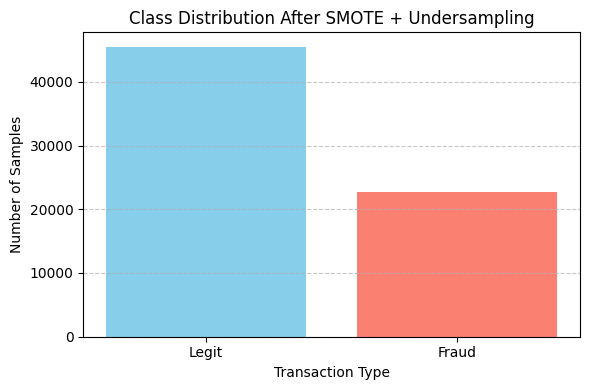

In [ ]:
# Resampling
over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
pipeline = Pipeline([('o', over), ('u', under)])
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Ensure column order and consistent structure
columns_order = X_train.columns  # columns already reordered with scaled_time/amount first
X_resampled = pd.DataFrame(X_resampled, columns=columns_order)
X_test = X_test[columns_order]

# === Selective scaling ===

# Only standard-scale the V1–V28 features (do NOT re-scale 'scaled_time' or 'scaled_amount')
columns_to_scale = [col for col in columns_order if col not in ['scaled_time', 'scaled_amount']]
scaler = StandardScaler()

# Apply scaler to the appropriate subset
X_resampled_scaled_part = scaler.fit_transform(X_resampled[columns_to_scale])
X_test_scaled_part = scaler.transform(X_test[columns_to_scale])

# Combine with the already robust-scaled columns
X_resampled_scaled = pd.DataFrame(
    np.hstack([
        X_resampled[['scaled_time', 'scaled_amount']].values,
        X_resampled_scaled_part
    ]),
    columns=['scaled_time', 'scaled_amount'] + columns_to_scale
)

X_test_scaled = pd.DataFrame(
    np.hstack([
        X_test[['scaled_time', 'scaled_amount']].values,
        X_test_scaled_part
    ]),
    columns=['scaled_time', 'scaled_amount'] + columns_to_scale
)

# === Summary info ===
resampled_counts = pd.Series(y_resampled).value_counts().sort_index()

print("\n✅ Resampled class distribution (detailed):")
for label in resampled_counts.index:
    label_name = "Legit" if label == 0 else "Fraud"
    pct = resampled_counts[label] / len(y_resampled) * 100
    print(f"{label_name} ({label}): {resampled_counts[label]} samples ({pct:.2f}%)")

# Plot class distribution after resampling
plt.figure(figsize=(6, 4))
plt.bar(resampled_counts.index.map({0: "Legit", 1: "Fraud"}), resampled_counts.values, color=["skyblue", "salmon"])
plt.title("Class Distribution After SMOTE + Undersampling")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Samples")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 🤖 Define Models


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1,use_label_encoder=False, verbosity=0, random_state=42),
    "Linear SVM": CalibratedClassifierCV(estimator=LinearSVC(random_state=42), cv=3),
    "Logistic Regression": LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000, random_state=42)
}

## 🧪 Define Evaluation Functions


In [ ]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"\n🚀 Model: {name}")
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Check for probability support
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):  # fallback for models like SVM
        scores = model.decision_function(X_test)
        y_proba = (scores - scores.min()) / (scores.max() - scores.min())  # min-max scale
    else:
        raise ValueError(f"Model '{name}' does not support probability or confidence estimation.")

    # Classification report
    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Legit", "Fraud"], yticklabels=["Legit", "Fraud"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    prc_auc = auc(recall, precision)
    print(f"AUC-PR: {prc_auc:.4f}")

    plt.plot(recall, precision, label=f'{name} (AUC-PR = {prc_auc:.4f})')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve and AUC
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"AUC-ROC: {roc_auc:.4f}")

    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"ROC Curve - {name}")
    plt.grid(True)
    plt.show()

    return {
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-PR': prc_auc,
        'AUC-ROC': roc_auc
    }

## 📈 Evaluate All Models and Visualize Results



📦 Evaluating: Random Forest

🚀 Model: Random Forest

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9992    0.9995     56864
           1     0.6591    0.8878    0.7565        98

    accuracy                         0.9990     56962
   macro avg     0.8294    0.9435    0.8780     56962
weighted avg     0.9992    0.9990    0.9991     56962



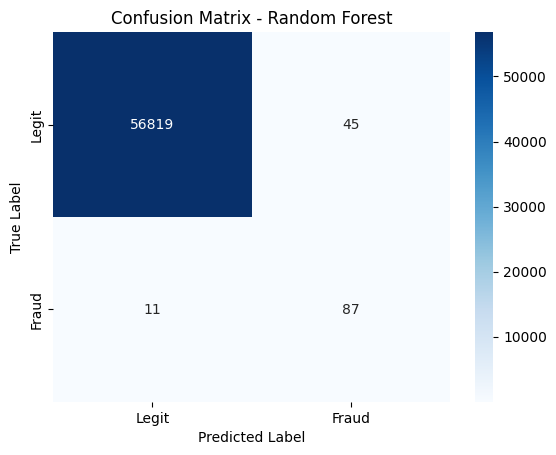

AUC-PR: 0.8572


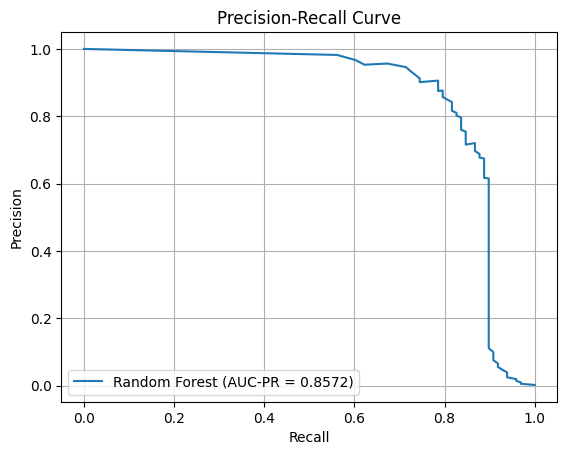

AUC-ROC: 0.9755


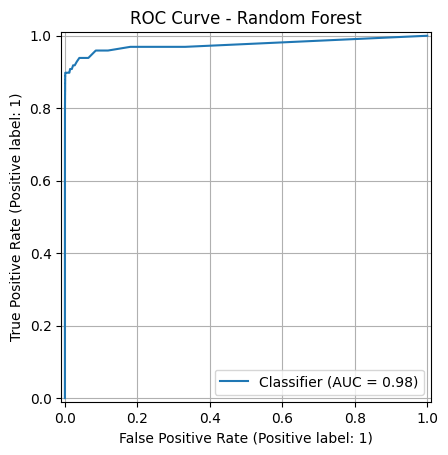


📦 Evaluating: XGBoost

🚀 Model: XGBoost

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9977    0.9988     56864
           1     0.4055    0.8980    0.5587        98

    accuracy                         0.9976     56962
   macro avg     0.7027    0.9478    0.7788     56962
weighted avg     0.9988    0.9976    0.9980     56962



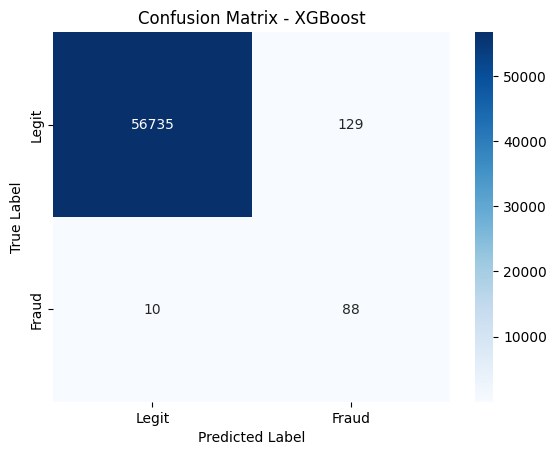

AUC-PR: 0.8378


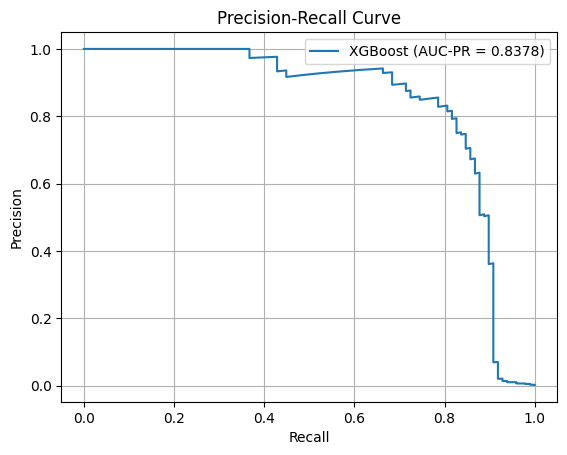

AUC-ROC: 0.9770


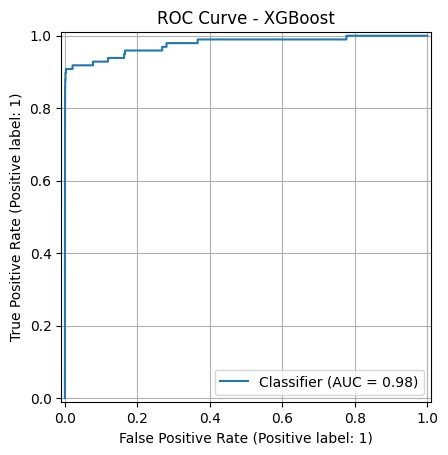


📦 Evaluating: Linear SVM

🚀 Model: Linear SVM

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9852    0.9924     56864
           1     0.0945    0.8980    0.1710        98

    accuracy                         0.9850     56962
   macro avg     0.5472    0.9416    0.5817     56962
weighted avg     0.9983    0.9850    0.9910     56962



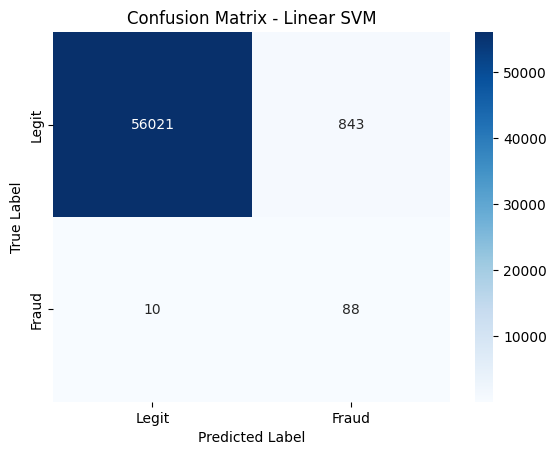

AUC-PR: 0.7489


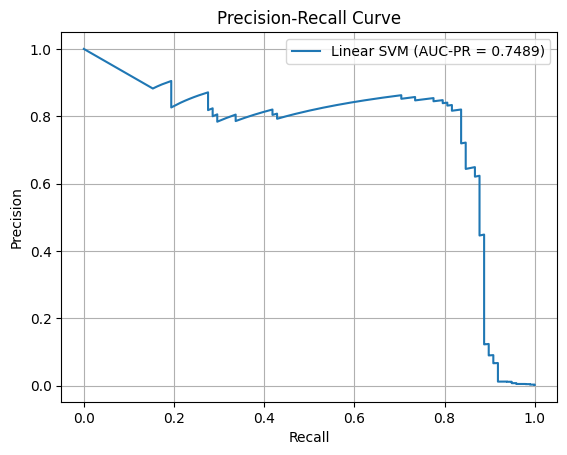

AUC-ROC: 0.9745


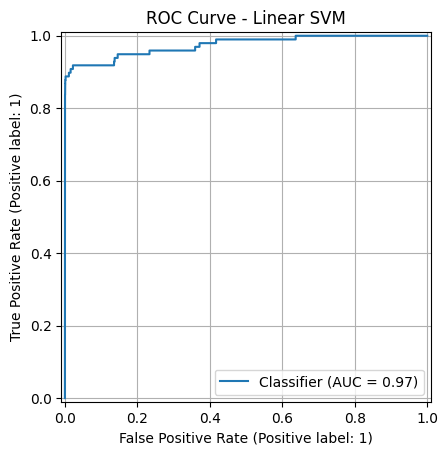


📦 Evaluating: Logistic Regression

🚀 Model: Logistic Regression

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9743    0.9869     56864
           1     0.0580    0.9184    0.1091        98

    accuracy                         0.9742     56962
   macro avg     0.5289    0.9463    0.5480     56962
weighted avg     0.9982    0.9742    0.9854     56962



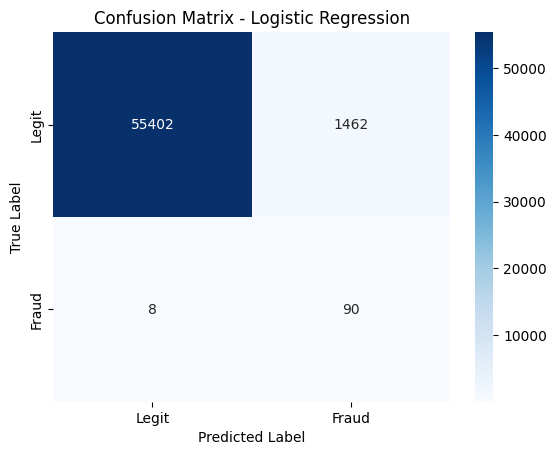

AUC-PR: 0.7669


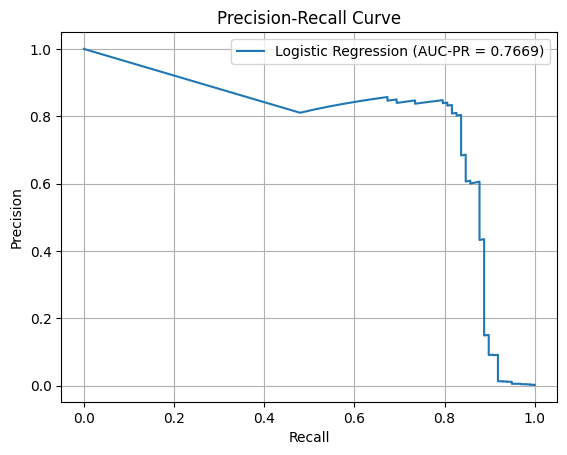

AUC-ROC: 0.9711


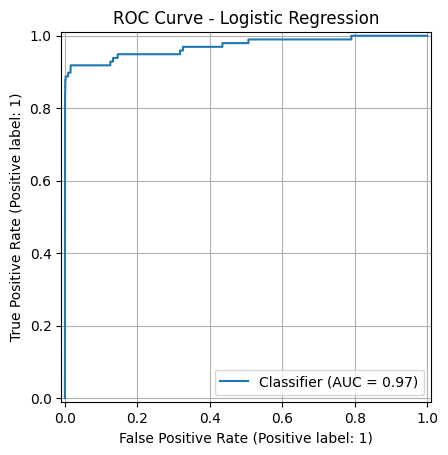


📊 Final Model Performance Summary:


,Model,Precision,Recall,F1-Score,AUC-PR,AUC-ROC
0,Random Forest,0.6591,0.8878,0.7565,0.8572,0.9755
1,XGBoost,0.4055,0.8980,0.5587,0.8378,0.9770
2,Logistic Regression,0.0580,0.9184,0.1091,0.7669,0.9711
3,Linear SVM,0.0945,0.8980,0.1710,0.7489,0.9745


In [ ]:
# Initialize results list
results = []

# Evaluate each model using resampled training data
for name, model in models.items():
    print(f"\n📦 Evaluating: {name}")

    if name in ["Linear SVM", "Logistic Regression"]:
        metrics = evaluate_model(name, model, X_resampled_scaled, y_resampled, X_test_scaled, y_test)
    else:
        metrics = evaluate_model(name, model, X_resampled, y_resampled, X_test, y_test)

    results.append(metrics)

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values(by='AUC-PR', ascending=False).reset_index(drop=True)

# Display final summary (styled)
print("\n📊 Final Model Performance Summary:")
display(
    results_df.style
    .background_gradient(subset=["AUC-PR", "AUC-ROC", "F1-Score"], cmap="YlGn")
    .format({
        "Precision": "{:.4f}",
        "Recall": "{:.4f}",
        "F1-Score": "{:.4f}",
        "AUC-PR": "{:.4f}",
        "AUC-ROC": "{:.4f}"
    })
)

## 📊 Visual Comparison

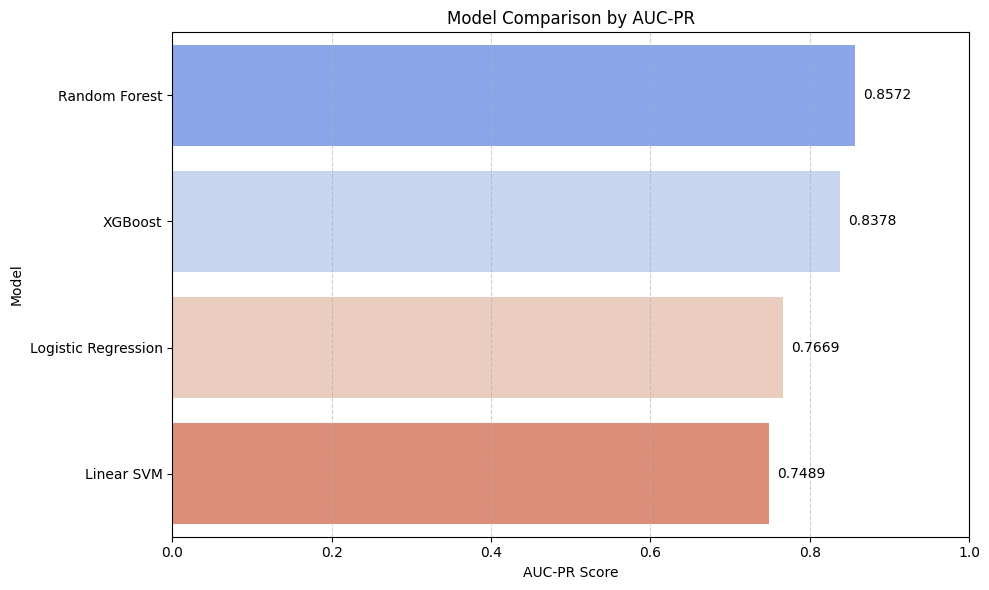

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=results_df, x='AUC-PR', y='Model', hue='Model', dodge=False, palette='coolwarm', legend=False)
plt.title("Model Comparison by AUC-PR")
plt.xlabel("AUC-PR Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels
for i, value in enumerate(results_df['AUC-PR']):
    ax.text(value + 0.01, i, f"{value:.4f}", va='center')

plt.tight_layout()
plt.show()

## 📁 K-Fold Cross-Validation for Random Forest




In [ ]:
# Ensure X_resampled is a DataFrame and y_resampled is a Series or array
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.Series(y_resampled)

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store metrics for averaging
metrics_per_fold = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_resampled, y_resampled)):
    print(f"\n📁 Fold {fold + 1}/{n_splits}")

    X_train_fold = X_resampled.iloc[train_idx]
    X_val_fold = X_resampled.iloc[val_idx]
    y_train_fold = y_resampled.iloc[train_idx]
    y_val_fold = y_resampled.iloc[val_idx]

    # Fresh model per fold
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    model.fit(X_train_fold, y_train_fold)
    y_pred = model.predict(X_val_fold)
    y_proba = model.predict_proba(X_val_fold)[:, 1]

    # Collect metrics
    precision = precision_score(y_val_fold, y_pred)
    recall = recall_score(y_val_fold, y_pred)
    f1 = f1_score(y_val_fold, y_pred)
    roc_auc = roc_auc_score(y_val_fold, y_proba)

    metrics_per_fold.append({
        "Fold": fold + 1,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "AUC-ROC": roc_auc
    })

    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f} | AUC-ROC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_val_fold, y_pred))

# Convert results to DataFrame
cv_results = pd.DataFrame(metrics_per_fold)
print("\n📊 Cross-Validation Results (Random Forest):")
print(cv_results)
print("\n📈 Average Performance Across Folds:")
print(cv_results.mean(numeric_only=True))


📁 Fold 1/5
Precision: 0.9989 | Recall: 0.9956 | F1: 0.9972 | AUC-ROC: 0.9999
Confusion Matrix:
 [[9098    5]
 [  20 4524]]

📁 Fold 2/5
Precision: 0.9989 | Recall: 0.9958 | F1: 0.9973 | AUC-ROC: 1.0000
Confusion Matrix:
 [[9116    5]
 [  19 4507]]

📁 Fold 3/5
Precision: 0.9993 | Recall: 0.9952 | F1: 0.9973 | AUC-ROC: 1.0000
Confusion Matrix:
 [[9058    3]
 [  22 4564]]

📁 Fold 4/5
Precision: 0.9983 | Recall: 0.9957 | F1: 0.9970 | AUC-ROC: 0.9999
Confusion Matrix:
 [[9004    8]
 [  20 4615]]

📁 Fold 5/5
Precision: 0.9991 | Recall: 0.9924 | F1: 0.9957 | AUC-ROC: 0.9999
Confusion Matrix:
 [[9189    4]
 [  34 4420]]

📊 Cross-Validation Results (Random Forest):
   Fold  Precision    Recall        F1   AUC-ROC
0     1   0.998896  0.995599  0.997245  0.999901
1     2   0.998892  0.995802  0.997345  0.999993
2     3   0.999343  0.995203  0.997269  0.999980
3     4   0.998270  0.995685  0.996976  0.999896
4     5   0.999096  0.992366  0.995720  0.999906

📈 Average Performance Across Folds:
Fold

## 🎯 Hyperparameter Tuning

In [ ]:
# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [10, 20, 30, 40, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True, False]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.7, 1.0],
        'colsample_bytree': [0.7, 1.0]
    },
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    }
}

# Models to tune
models_to_tune = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, verbosity=0, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Subsample data for tuning
X_small_unscaled, _, y_small, _ = train_test_split(X_resampled, y_resampled, train_size=10000, stratify=y_resampled, random_state=42)
X_small_scaled, _, _, _ = train_test_split(X_resampled_scaled, y_resampled, train_size=10000, stratify=y_resampled, random_state=42)

# Dictionary to store best estimators
best_models = {}

# Run tuning
for name, model in models_to_tune.items():
    print(f"\n🔧 Tuning {name}...")
    grid = param_grids[name]
    n_iter = 5 if name == "Random Forest" else 10

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=grid,
        n_iter=n_iter,
        scoring='average_precision',
        cv=3,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    # Use scaled data for logistic regression, unscaled for others
    X_fit = X_small_scaled if name == "Logistic Regression" else X_small_unscaled
    search.fit(X_fit, y_small)

    best_models[name] = search.best_estimator_
    print(f"✅ Best Params for {name}: {search.best_params_}")


🔧 Tuning Random Forest...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
✅ Best Params for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}

🔧 Tuning XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Params for XGBoost: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.7}

🔧 Tuning Logistic Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best Params for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 100}


## 🧪 Evaluate Tuned Models


📦 Evaluating Tuned: Random Forest

🚀 Model: Random Forest (Tuned)

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9994    0.9996     56864
           1     0.7073    0.8878    0.7873        98

    accuracy                         0.9992     56962
   macro avg     0.8536    0.9436    0.8935     56962
weighted avg     0.9993    0.9992    0.9992     56962



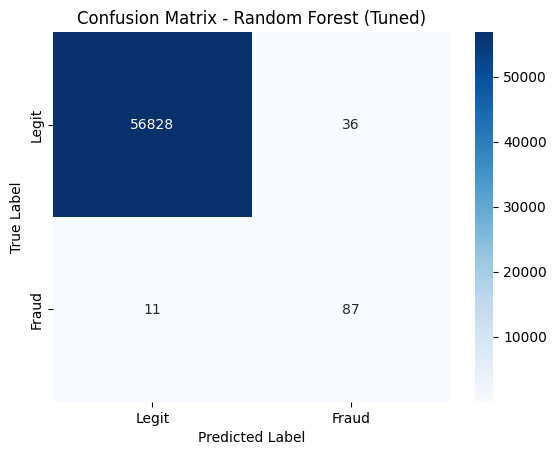

AUC-PR: 0.8693


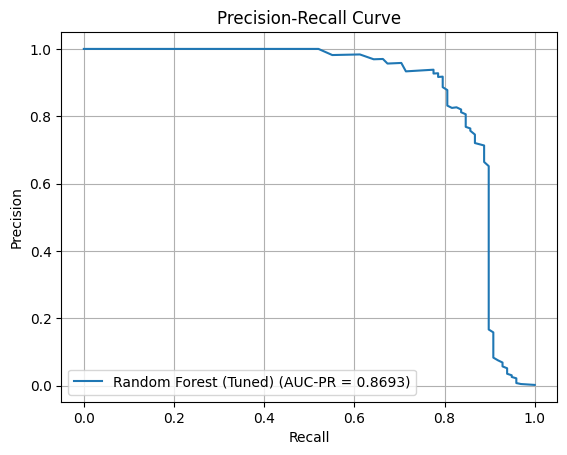

AUC-ROC: 0.9738


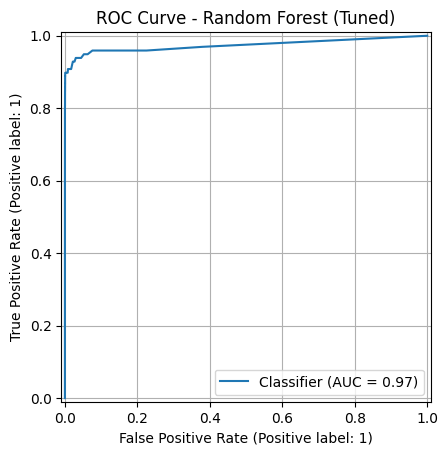


📦 Evaluating Tuned: XGBoost

🚀 Model: XGBoost (Tuned)

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9987    0.9992     56864
           1     0.5346    0.8673    0.6615        98

    accuracy                         0.9985     56962
   macro avg     0.7672    0.9330    0.8304     56962
weighted avg     0.9990    0.9985    0.9987     56962



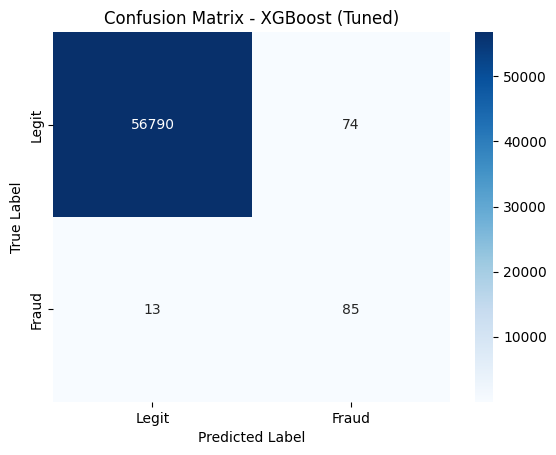

AUC-PR: 0.8460


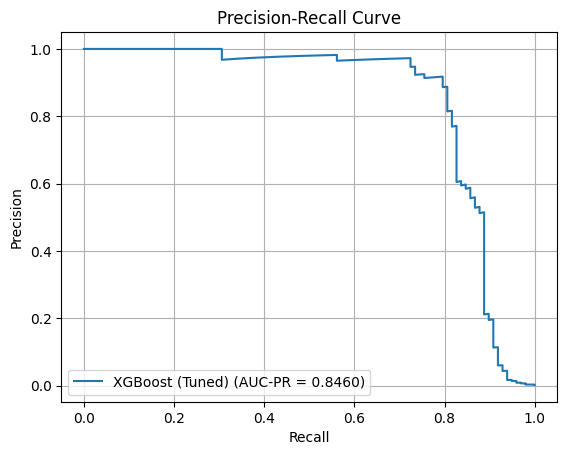

AUC-ROC: 0.9796


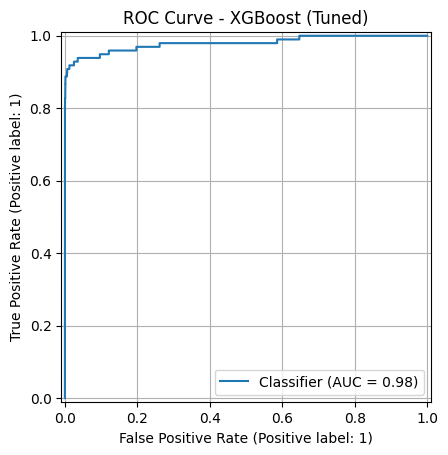


📦 Evaluating Tuned: Logistic Regression

🚀 Model: Logistic Regression (Tuned)

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9866    0.9932     56864
           1     0.1037    0.8980    0.1859        98

    accuracy                         0.9865     56962
   macro avg     0.5517    0.9423    0.5895     56962
weighted avg     0.9983    0.9865    0.9918     56962



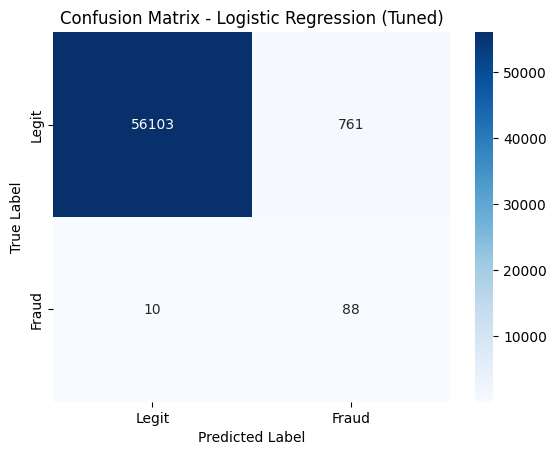

AUC-PR: 0.7689


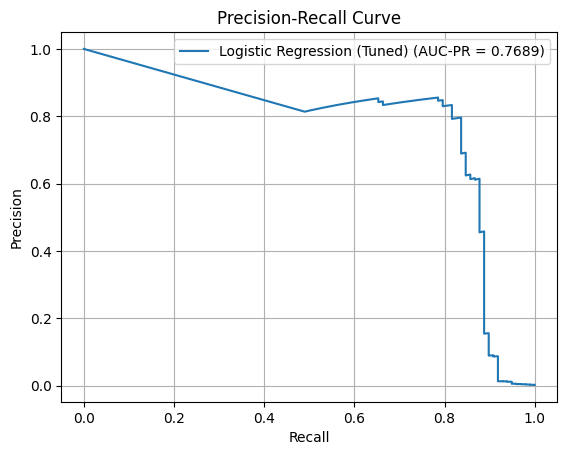

AUC-ROC: 0.9697


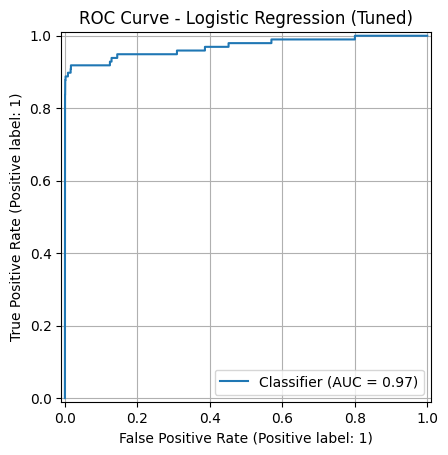


📊 Final Model Performance Summary (with Tuned Models):


,Model,Precision,Recall,F1-Score,AUC-PR,AUC-ROC
0,Random Forest (Tuned),0.7073,0.8878,0.7873,0.8693,0.9738
1,XGBoost (Tuned),0.5346,0.8673,0.6615,0.8460,0.9796
2,Logistic Regression (Tuned),0.1037,0.8980,0.1859,0.7689,0.9697


In [ ]:
tuned_results = []

# Evaluate tuned models
for name, model in best_models.items():
    print(f"\n📦 Evaluating Tuned: {name}")
    tuned_name = f"{name} (Tuned)"

    if name == "Logistic Regression":
        metrics = evaluate_model(tuned_name, model, X_resampled_scaled, y_resampled, X_test_scaled, y_test)
    else:
        metrics = evaluate_model(tuned_name, model, X_resampled, y_resampled, X_test, y_test)

    tuned_results.append(metrics)

# Create and display updated results table
tuned_results_df = pd.DataFrame(tuned_results).sort_values(by='AUC-PR', ascending=False).reset_index(drop=True)

print("\n📊 Final Model Performance Summary (with Tuned Models):")
display(
    tuned_results_df.style
    .background_gradient(subset=["AUC-PR", "AUC-ROC", "F1-Score"], cmap="YlGn")
    .format({
        "Precision": "{:.4f}",
        "Recall": "{:.4f}",
        "F1-Score": "{:.4f}",
        "AUC-PR": "{:.4f}",
        "AUC-ROC": "{:.4f}"
    })
)

## 📊 Full Model Comparison: Untuned vs Tuned Versions

| **Model**                    | **Precision** | **Recall** | **F1-Score** | **AUC-PR** | **AUC-ROC** |
|------------------------------|---------------|------------|--------------|------------|-------------|
| Random Forest                | 0.6591        | 0.8878     | 0.7565       | 0.8572     | 0.9755      |
| ✅ Random Forest (Tuned)      | **0.7073**    | **0.8878** | **0.7873**   | **0.8693** | **0.9738**  |
| XGBoost                      | 0.4055        | 0.8980     | 0.5587       | 0.8378     | 0.9770      |
| ✅ XGBoost (Tuned)            | **0.5346**    | **0.8673**     | **0.6615**   | **0.8460** | **0.9796**  |
| Logistic Regression          | 0.0580        | 0.9184     | 0.1091       | 0.7669     | 0.9711      |
| ✅ Logistic Regression (Tuned) | 0.1037       | 0.8980     | 0.1859       | 0.7689     | 0.9696      |
| Linear SVM                   | 0.0945        | 0.8980     | 0.1710       | 0.7489     | 0.9745      |

### 🔍 Key Takeaways

- ✅ **Random Forest (Tuned)**: Outperforms all others in **F1-Score** and **AUC-PR**, making it the best model for imbalanced classification tasks where both precision and recall matter.
- 📈 **XGBoost (Tuned)**: Shows the highest **AUC-ROC**, indicating its superior ability to distinguish between classes, but sacrifices **precision** and **F1-Score** compared to Random Forest.
- ❌ **Logistic Regression** and **Linear SVM**: Both models exhibit low **precision** despite high **recall**, suggesting a high number of false positives. These models might not be suitable for applications where precision is critical.

> ℹ️ **Note**: *Linear SVM was not tuned due to high computational cost and poor baseline performance. Given its low performance relative to other models, hyperparameter tuning was deprioritized.*

> 🧪 **Additional Note**: *The tuned Random Forest model was optimized using only a 10,000-sample subset of the training data. Despite this constraint, it still achieved superior performance, highlighting its robustness and generalization strength.*


## 📊 Plot the top 15 feature importances from the tuned Random Forest


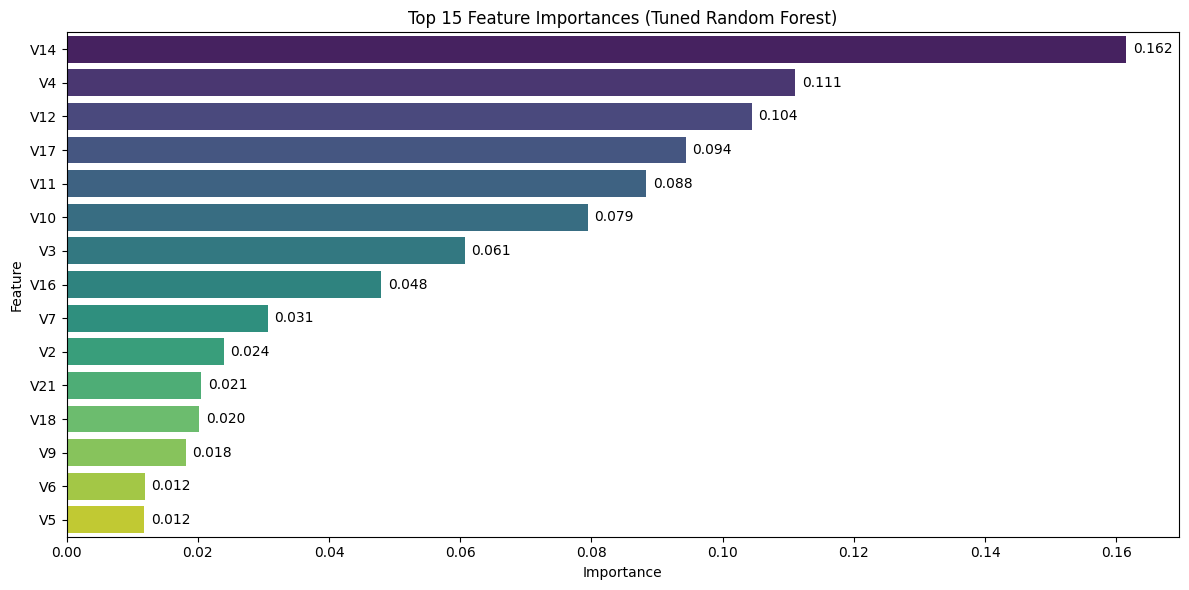

In [ ]:
# Access the best Random Forest model
best_rf_model = best_models['Random Forest']

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Use column names from X_resampled (not scaled)
feature_names = X_resampled.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort and plot
top_15_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=top_15_features, hue='Feature', palette='viridis', dodge=False, legend=False)
plt.title('Top 15 Feature Importances (Tuned Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')

for i, (val, name) in enumerate(zip(top_15_features['Importance'], top_15_features['Feature'])):
    plt.text(val + 0.001, i, f"{val:.3f}", va='center', ha='left')

plt.tight_layout()
plt.show()

## ✅ Conclusion

In this project, we developed and evaluated multiple machine learning models to detect **fraudulent credit card transactions** in a highly imbalanced dataset. To address the extreme class imbalance (~0.17% fraud), we applied a combination of **SMOTE** and **random undersampling**, which helped improve sensitivity to fraud while avoiding model overfitting.

After evaluating several models and applying hyperparameter tuning, the **Random Forest classifier** emerged as the best performer, achieving:

- **AUC-PR:** 0.8693  
- **Recall:** 0.8878  
- **Precision** increased from 0.6591 to 0.7073 compared to the untuned version — reducing false positives

Feature importance analysis showed that PCA components **V14**, **V4**, and **V12** were the most influential, reflecting critical underlying patterns in transaction behavior.

This balance of strong fraud detection (high recall) and better control over false alarms (precision) makes the tuned Random Forest model a promising baseline for real-world fraud detection systems — particularly in scenarios where **catching fraud is prioritized over minimizing false alerts**.
>🔎 **Note**: *The best-performing untuned Random Forest was evaluated using 5-fold cross-validation, whereas the tuned version was assessed on a single holdout test set. As such, slight differences in performance may reflect evaluation variance rather than true model degradation.*
